## Implement Linear Regression Using Tensorflow V1 or V2

##### Import the necessary libraries

In [1]:
import numpy as np
import tensorflow as tf

#### In order to make the random numbers predictable, define fixedseeds for both Numpy and Tensorflow.(reproducible)

In [4]:
np.random.seed(40)
tf.random.set_seed(40)

##### Generate random linear data and add uniform noise to it

In [10]:
import tensorflow as tf
import numpy as np

# Define fixed seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate random linear data
def generate_linear_data(num_samples, slope, intercept, noise_std):
    X = np.random.rand(num_samples, 1)
    noise = np.random.uniform(-noise_std, noise_std, size=(num_samples, 1))
    y = slope * X + intercept + noise
    return X, y

# Hyperparameters
learning_rate = 0.01
training_epochs = 1000

# Generate data
slope = 3.5
intercept = 2.0
noise_std = 0.1
X_train, y_train = generate_linear_data(100, slope, intercept, noise_std)

# Convert NumPy arrays to TensorFlow tensors
X_train = tf.constant(X_train, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)

# Create the model
class LinearRegression(tf.Module):
    def __init__(self):
        self.W = tf.Variable(tf.random.normal(shape=(1, 1), mean=0.0, stddev=0.1))
        self.b = tf.Variable(tf.zeros(shape=(1,)))

    def __call__(self, inputs):
        return tf.matmul(inputs, self.W) + self.b

# Define the loss function (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Initialize the model
model = LinearRegression()

# Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

# Training loop
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_pred = model(X_train)
        loss = mean_squared_error(y_train, y_pred)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

# Get the final training cost, weight, and bias
final_cost = loss.numpy()
final_weight = model.W.numpy()[0][0]
final_bias = model.b.numpy()[0]


Epoch 0, Loss: 14.2281
Epoch 100, Loss: 0.3499
Epoch 200, Loss: 0.1955
Epoch 300, Loss: 0.1476
Epoch 400, Loss: 0.1121
Epoch 500, Loss: 0.0853
Epoch 600, Loss: 0.0651
Epoch 700, Loss: 0.0498
Epoch 800, Loss: 0.0384
Epoch 900, Loss: 0.0298


####  What are the obtained values of the training cost, weight and bias?

In [11]:
print("\nTraining finished!")
print("Final training cost:", final_cost)
print("Final weight:", final_weight)
print("Final bias:", final_bias)


Training finished!
Final training cost: 0.023308072
Final weight: 3.0207157
Final bias: 2.241841


In [4]:
pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Keerthana\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: C:\Users\Keerthana\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
np.random.seed(101)

In [4]:
x=np.linspace(0,50,50)
y=np.linspace(0,50,50)

In [5]:
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

In [6]:
n=len(x)

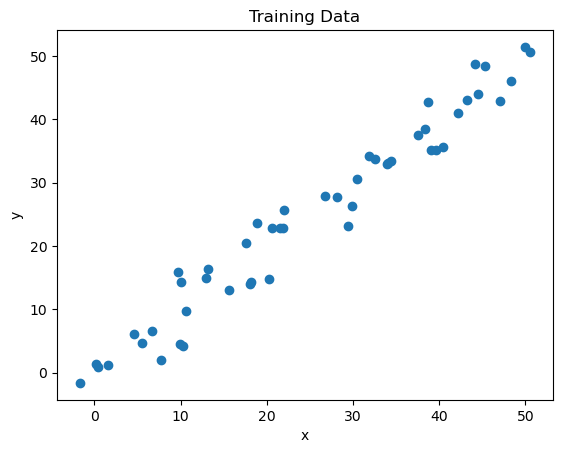

In [7]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()


In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [10]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [11]:
W = tf.Variable(np.random.randn(), name="W")
b = tf.Variable(np.random.randn(), name="b")


In [12]:
learning_rate = 0.01
training_epochs = 1000


In [13]:
y_pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()


In [14]:

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (_x, _y) in zip(x, y):
            sess.run(optimizer, feed_dict={X: _x, Y: _y})
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict={X: x, Y: y})
            print("Epoch", (epoch + 1), ": cost =", c,
                  "W =", sess.run(W), "b =", sess.run(b))
    training_cost = sess.run(cost, feed_dict={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)


Epoch 50 : cost = 5.8868036 W = 0.9951241 b = 1.238105
Epoch 100 : cost = 5.7912693 W = 0.99812365 b = 1.0914395
Epoch 150 : cost = 5.7119675 W = 1.0008028 b = 0.96044284
Epoch 200 : cost = 5.6459413 W = 1.0031956 b = 0.84343934
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.7389355
Epoch 300 : cost = 5.544608 W = 1.007242 b = 0.6455921
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56221986
Epoch 400 : cost = 5.473065 W = 1.01047 b = 0.48775342
Epoch 450 : cost = 5.445385 W = 1.0118302 b = 0.42124158
Epoch 500 : cost = 5.4219036 W = 1.0130452 b = 0.36183482
Epoch 550 : cost = 5.4019217 W = 1.0141305 b = 0.30877408
Epoch 600 : cost = 5.3848557 W = 1.0150996 b = 0.2613811
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905078
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124203
Epoch 750 : cost = 5.3468933 W = 1.0174294 b = 0.14747237
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730931
Epoch 850 : cost = 5.3294754 W = 1.0185971 b = 0.090368524
Epoch 900 : cost = 5.322459 

In [15]:
predictions = weight * x + bias
print("Training cost =", training_cost,
      "Weight =", weight, "bias =", bias, '\n')


Training cost = 5.3110332 Weight = 1.0199214 bias = 0.02561658 



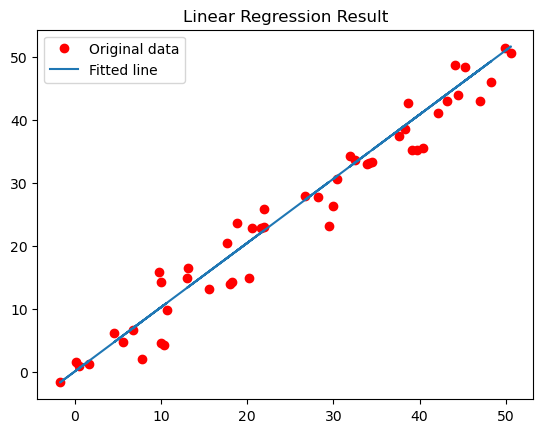

In [16]:
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predictions, label='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()
